In [7]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/tjysdsg/powerlifting-prediction/master/openpowerlifting.csv'
data = pd.read_csv(url)
data.drop(["Squat4Kg","Bench4Kg","Deadlift4Kg"],axis=1,inplace=True)
data.drop_duplicates(inplace=True)
display(data.head())
display(data.describe())

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,47.63,20.41,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,142.88,95.25,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,142.88,95.25,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,95.25,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,31.75,90.72,122.47,1,130.47


,MeetID,Age,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Wilks
count,385869.000000,147028.000000,383470.000000,297905.000000,355925.000000,317447.000000,362797.000000,361754.000000
mean,5144.518326,31.665292,86.928824,176.551997,118.336628,195.038527,424.060625,301.134531
std,2551.532044,12.898242,23.138102,69.190264,54.843991,61.567345,196.317720,116.333631
min,0.000000,5.000000,15.880000,-477.500000,-522.500000,-410.000000,11.000000,13.730000
25%,2990.000000,22.000000,70.300000,127.500000,79.380000,147.500000,272.500000,237.570000
50%,5961.000000,28.000000,83.190000,174.630000,115.000000,195.000000,424.110000,319.720000
75%,7176.000000,39.000000,100.000000,217.720000,150.000000,238.140000,565.000000,379.320000
max,8481.000000,95.000000,242.400000,573.790000,488.500000,460.400000,1365.310000,779.380000


In [8]:
data_cleaned = data[(data['BestSquatKg'] > 0)&(data['BestBenchKg']>0)&(data['BestDeadliftKg']> 0)]
# encode
data_cleaned=data_cleaned.dropna()
data_cleaned['Sex'] = data_cleaned['Sex'].map( {'M':1, 'F':0} )
# encode
from sklearn.preprocessing import LabelEncoder
data_cleaned['Equipment'] = LabelEncoder().fit_transform(data_cleaned['Equipment'])
data_cleaned['WeightClassKg'] = LabelEncoder().fit_transform(data_cleaned['WeightClassKg'])

data_cleaned.describe()

,MeetID,Sex,Equipment,Age,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Wilks
count,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000,96717.000000
mean,6177.728910,0.679467,1.527477,29.907219,85.437244,24.439023,178.111797,116.515698,200.686586,495.313166,358.852828
std,2694.723747,0.466684,0.853187,11.946703,22.862687,14.550115,67.953002,50.111185,61.689678,173.593622,76.736731
min,0.000000,0.000000,0.000000,7.000000,24.100000,0.000000,13.600000,6.800000,12.000000,38.600000,28.230000
25%,5717.000000,0.000000,1.000000,21.500000,67.800000,8.000000,124.740000,72.500000,149.690000,347.500000,308.140000
50%,7312.000000,1.000000,1.000000,26.000000,82.070000,29.000000,175.000000,115.000000,202.500000,498.950000,356.990000
75%,7977.000000,1.000000,2.000000,36.000000,98.970000,36.000000,222.500000,150.000000,247.500000,617.500000,406.610000
max,8462.000000,1.000000,3.000000,93.000000,230.800000,44.000000,548.850000,442.250000,440.000000,1363.050000,779.380000


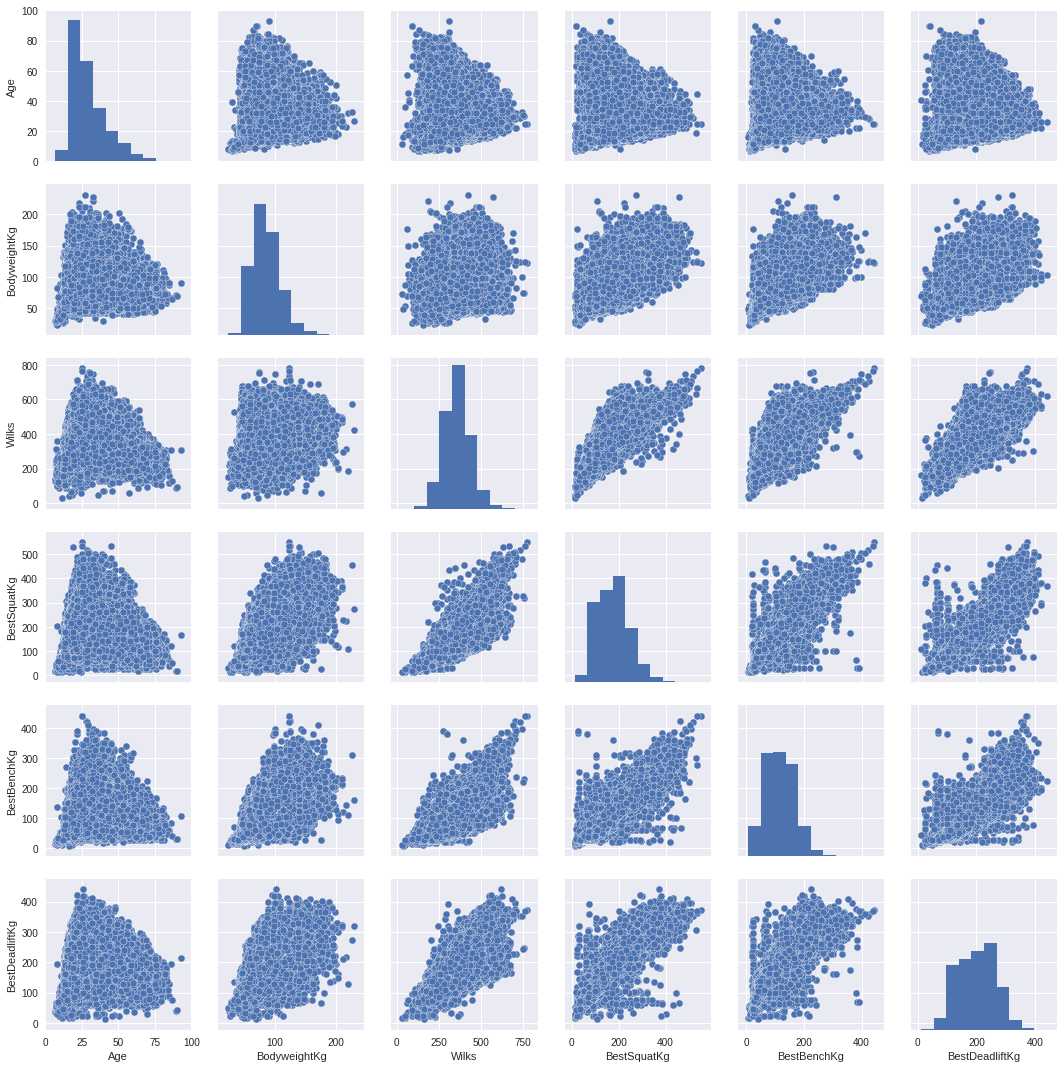

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.pairplot(data_cleaned[['Age','BodyweightKg','Wilks','BestSquatKg','BestBenchKg','BestDeadliftKg']])

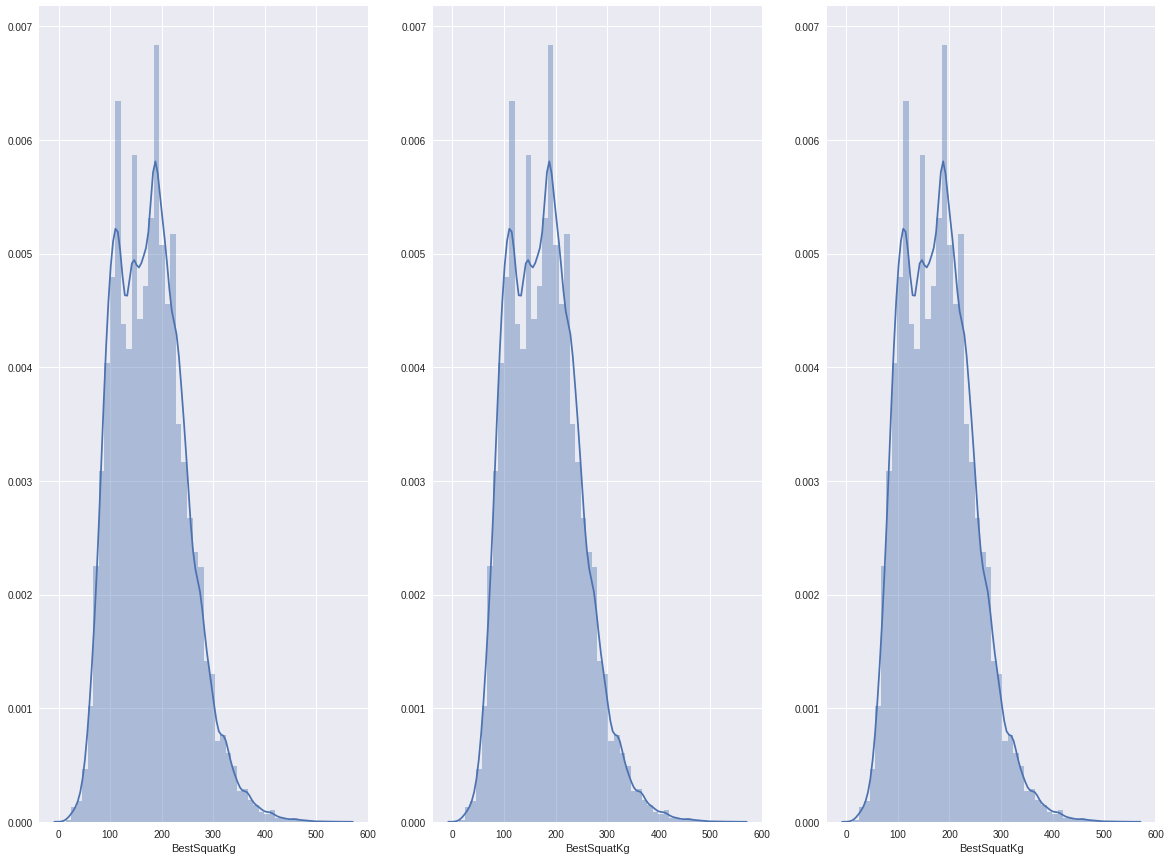

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;sns.set();
fig,ax = plt.subplots(1,3)
fig.set_size_inches(20, 15)
sns.distplot(data_cleaned['BestSquatKg'],ax=ax[0])
sns.distplot(data_cleaned['BestSquatKg'],ax=ax[1])
sns.distplot(data_cleaned['BestSquatKg'],ax=ax[2])

In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from keras.activations import *
from keras.optimizers import *
from keras.models import *
from keras.layers import *
#feature_names = ['Age','BodyweightKg', 'Equipment','Wilks','WeightClassKg','Sex']
#outcome_names = ['BestSquatKg','BestBenchKg','BestDeadliftKg']

def fit_with_features(features,outcomes):
    # features
    X = data_cleaned[features]
    # rescale features
    scaler_X = MinMaxScaler(feature_range=(0, 1)) 
    #X = scaler_X.fit_transform(X)
    # outcomes
    y = data_cleaned[outcomes]
    # split into a training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    # create model
    model = Sequential()
    model.add(Dense(np.power(2, 5), input_dim=X_train.shape[1], activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer= 'adam',
                  loss="mean_squared_error",
                  metrics=['acc'])
    result = model.fit(X_train, y_train,batch_size=32,epochs=3,verbose=1)
    evaluation = model.evaluate(X_test,y_test)
    print("Accuracy:",evaluation[1])

Using TensorFlow backend.


In [12]:
fit_with_features(['Age','BodyweightKg', 'Equipment','Wilks','WeightClassKg','Sex'],['BestSquatKg','BestBenchKg','BestDeadliftKg'])
fit_with_features(['Age','BodyweightKg', 'Equipment','WeightClassKg','Sex'],['BestSquatKg','BestBenchKg','BestDeadliftKg'])
fit_with_features(['Age','BodyweightKg', 'Equipment','Wilks','Sex'],['BestSquatKg','BestBenchKg','BestDeadliftKg'])
fit_with_features(['Age','BodyweightKg','Sex'],['BestSquatKg','BestBenchKg','BestDeadliftKg'])

Epoch 1/3
67701/67701 [==============================] - 3s 43us/step - loss: 32057.6514 - acc: 0.8166
Epoch 2/3
67701/67701 [==============================] - 2s 34us/step - loss: 32056.5426 - acc: 0.8322
Epoch 3/3
29016/29016 [==============================] - 1s 17us/step
Accuracy: 0.8335056520704728
Epoch 1/3
67701/67701 [==============================] - 2s 37us/step - loss: 31989.8092 - acc: 0.8324
Epoch 2/3
67701/67701 [==============================] - 2s 34us/step - loss: 31989.5762 - acc: 0.8331
Epoch 3/3
29016/29016 [==============================] - 1s 18us/step
Accuracy: 0.8314722911332769
Epoch 1/3
67701/67701 [==============================] - 3s 38us/step - loss: 32027.6295 - acc: 0.8058
Epoch 2/3
67701/67701 [==============================] - 2s 35us/step - loss: 32026.4036 - acc: 0.8340
Epoch 3/3
29016/29016 [==============================] - 1s 20us/step
Accuracy: 0.8294044665176743
Epoch 1/3
67701/67701 [==============================] - 3s 38us/step - loss: 32021.1

In [0]:
data_grouped = pd.concat([data_cleaned.groupby(['WeightClassKg'])['BestSquatKg'].mean()
                            ,data_cleaned.groupby(['WeightClassKg'])['BestBenchKg'].mean()
                            ,data_cleaned.groupby(['WeightClassKg'])['BestDeadliftKg'].mean()],axis=1)
data_grouped.columns = ['MeanBestSquatKg','MeanBestBenchKg','MeanBestDeadliftKg']